# HW7 - Clustering
Author : Bini Chandra

In [76]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [77]:
# Load the Spotify_Youtube dataset
data = pd.read_csv('./Data/Spotify_Youtube.csv')

data.head()

,Artist,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Views,Likes,Comments
0,Gorillaz,0.818,0.705,6,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559,693555221.0,6220896.0,169907.0
1,Gorillaz,0.676,0.703,8,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761,72011645.0,1079128.0,31003.0
2,Gorillaz,0.695,0.923,1,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014,8435055.0,282142.0,7399.0
3,Gorillaz,0.689,0.739,2,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423,211754952.0,1788577.0,55229.0
4,Gorillaz,0.663,0.694,10,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953,618480958.0,6197318.0,155930.0


In [78]:
# Extracting the relevant features
df = data[['Liveness', 'Energy', 'Loudness']]
df.head()

,Liveness,Energy,Loudness
0,0.6130,0.705,-6.679
1,0.0463,0.703,-5.815
2,0.1160,0.923,-3.930
3,0.0640,0.739,-5.810
4,0.0698,0.694,-8.627


K=2 --> Inertia: 103586.51, Silhouette Score: 0.6777
K=3 --> Inertia: 48112.70, Silhouette Score: 0.6086
K=4 --> Inertia: 28743.26, Silhouette Score: 0.5428
K=5 --> Inertia: 19546.53, Silhouette Score: 0.5231
K=6 --> Inertia: 14075.29, Silhouette Score: 0.5149
K=7 --> Inertia: 10789.43, Silhouette Score: 0.4980
K=8 --> Inertia: 8682.22, Silhouette Score: 0.4882
K=9 --> Inertia: 6966.42, Silhouette Score: 0.4870
K=10 --> Inertia: 5755.40, Silhouette Score: 0.4799


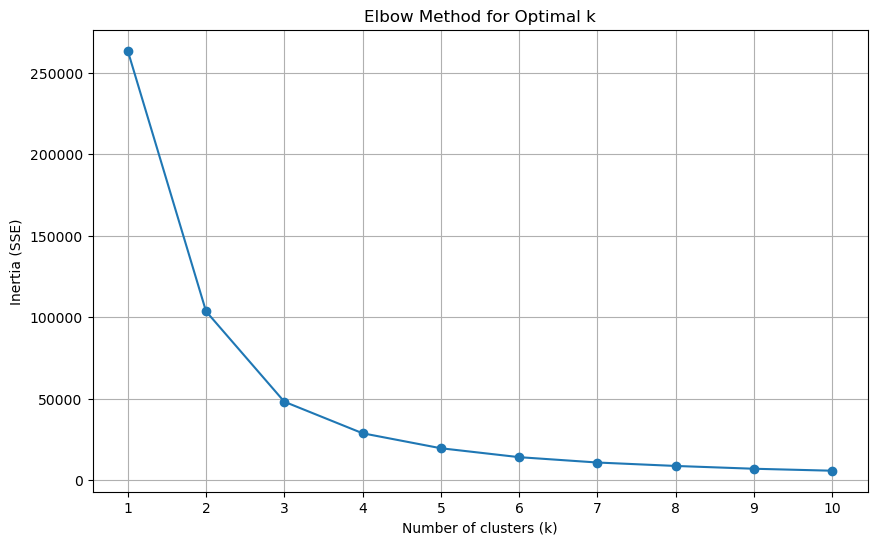

In [79]:
# Calculating inertia
inertia = []
sil_scores = []
k_range = range(1, 11)  # checking for 1 to 10 clusters
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

    if k > 1:
        # Calculate silhouette score only if k > 1
        score = silhouette_score(df, kmeans.labels_)
        print(f"K={k} --> Inertia: {kmeans.inertia_:.2f}, Silhouette Score: {score:.4f}")
        sil_scores.append(score)
    else:
        sil_scores.append(None)
    

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (SSE)')
plt.xticks(k_range)
plt.grid()
plt.show()


The elbow plot clearly shows an "elbow" at k=3, then it started to flatten. This means K=3 is a good balance point.

Even though, the silhouette score is highest at k=2 (0.6777), but k=3(0.6086) also had a strong score. So I am choosing k=3 because it will separate the songs into more  meaningful groups and will keep good cluster quality.

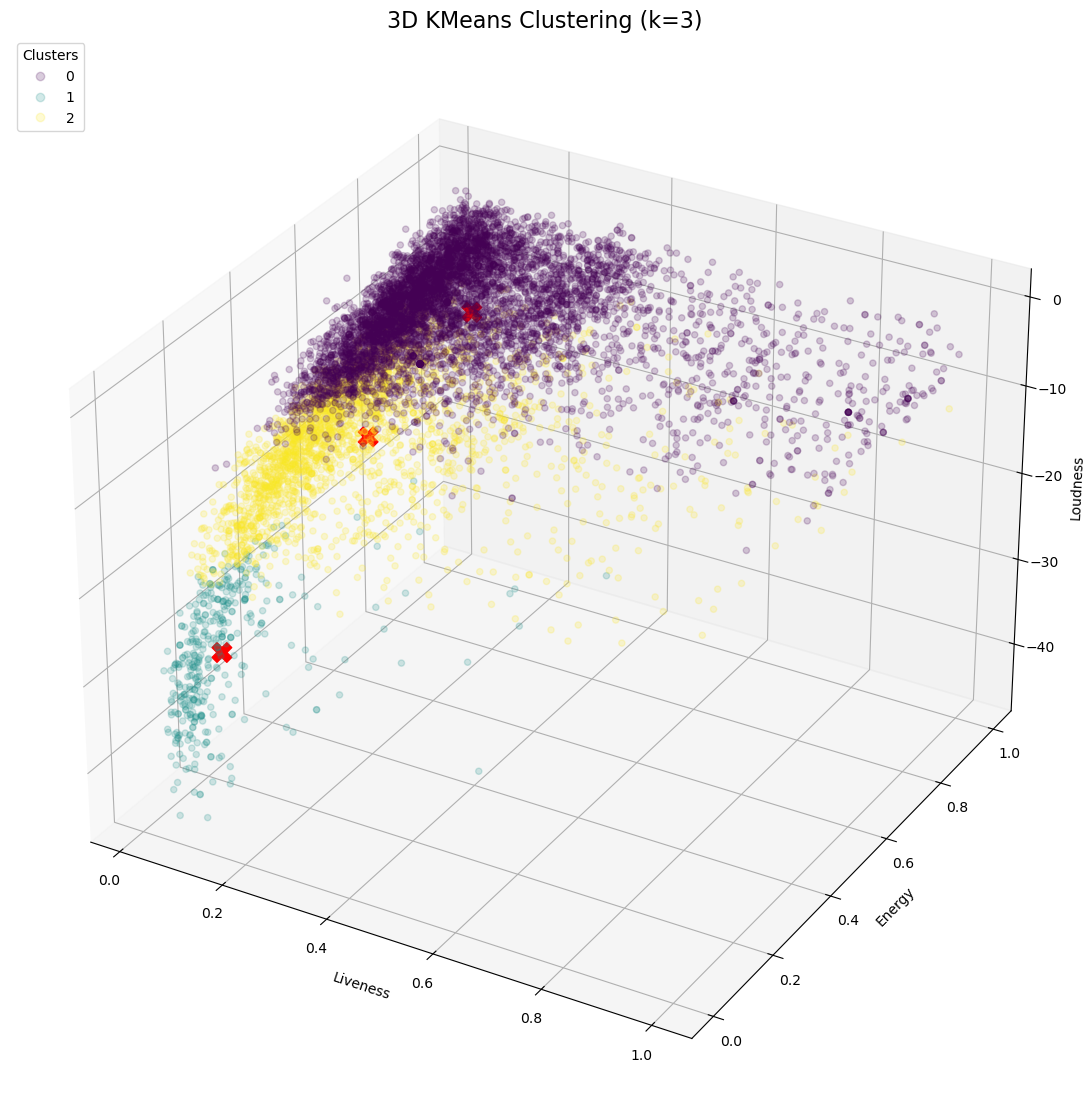

In [80]:
# Applying KMeans with our optimal k=3
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(df)
centroids = kmeans.cluster_centers_

# Create a 3D Scatter Plot
fig = plt.figure(figsize=(11, 12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='X', s=200, label="Centroids", alpha=1) # Plotting centroids
scatter = ax.scatter(df['Liveness'], df['Energy'], df['Loudness'], c=labels, cmap='viridis', alpha=0.2) # Plotting data points

# Adding titles/labels/legends
ax.set_title('3D KMeans Clustering (k=3)', fontsize=16)
ax.set_xlabel('Liveness')
ax.set_ylabel('Energy')
ax.set_zlabel('Loudness')
ax.legend(*scatter.legend_elements(), title="Clusters", loc="upper left")

plt.tight_layout()
plt.show()


After running KMeans with k=3 on the dataset, the 3D plot shows three distinct clusters/groups of songs based on Liveness, Energy and Loudness.

- **Cluster 0**: Songs with high energy and loudness. These are probably upbeat tracks like dance, energetic, or electronic music.
- **Cluster 2**: Songs with medium energy and loudness, possibly representing mid-tempo tracks like soft rock or pop.
- **Cluster 1**: Songs with low energy, low liveness, and low loudness. These could be calm, instrumental, or classical songs.

Overall, we can see that KMeans clustering has helped divide the songs into clear, meaningful groups based on how energetic, loud, and lively they are.


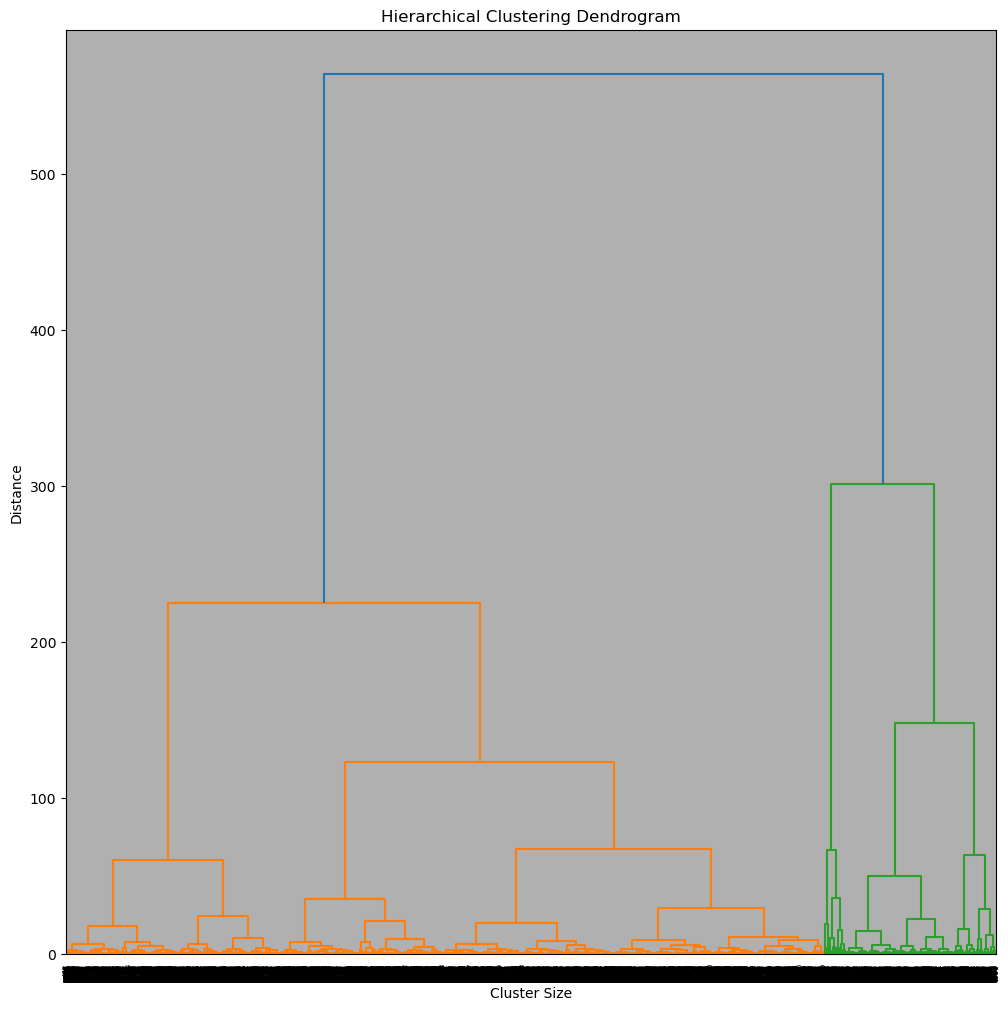

In [81]:
# Hierarchical Clustering

# Plotting the dendrogram
plt.figure(figsize=(12, 12))
dendrogram(linkage(df, method='ward'))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.grid()
plt.show()


I have created a dendrogram to check how many groups naturally exist in the dataset. And it clearly shows a large vertical gap near the top, which suggests that cutting the tree at 3 clusters is reasonable. So, I am choosing 3 clusters which matches the KMeans result.

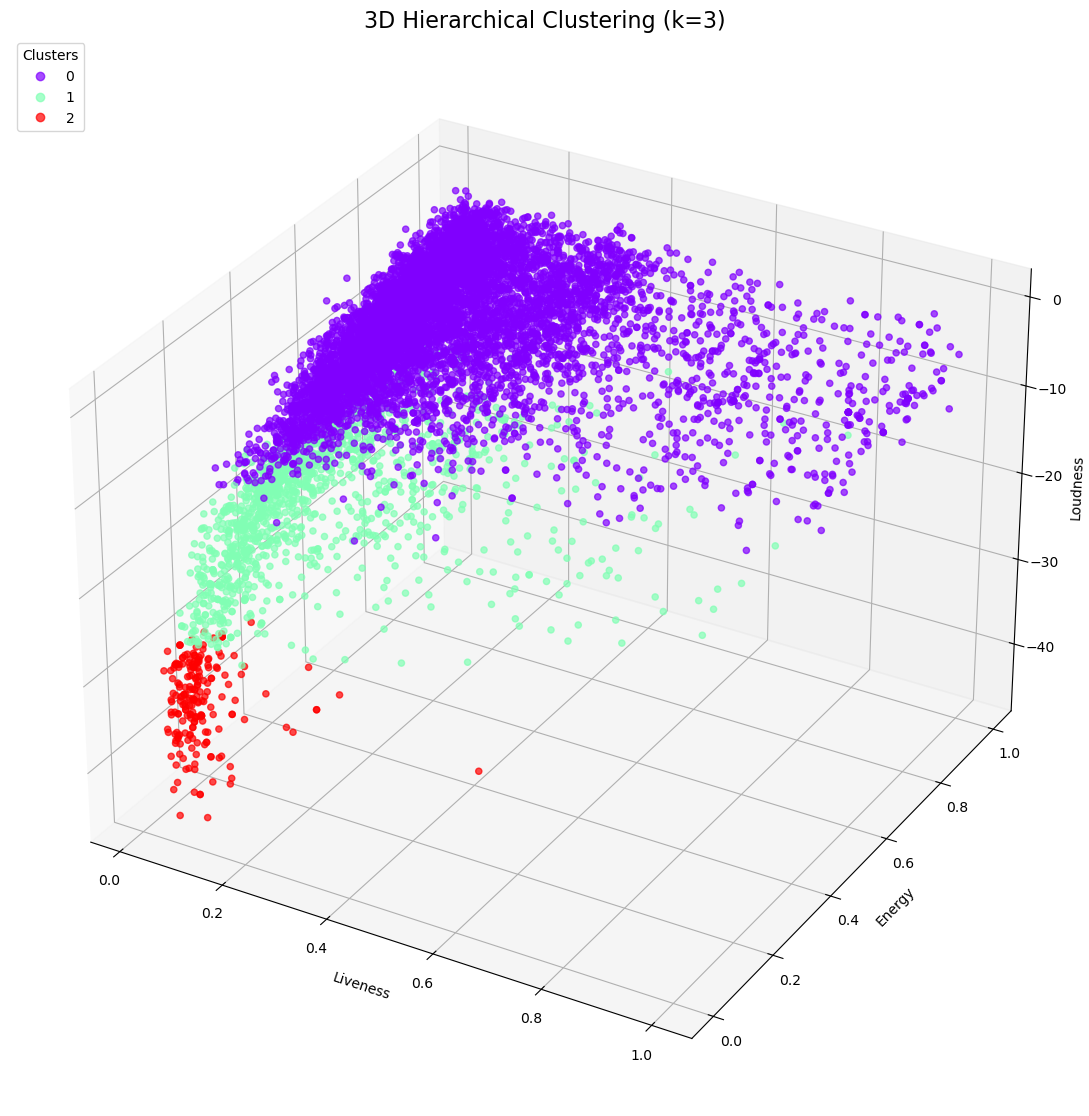

In [82]:
# Hierarchical Clustering 3D Scatter Plot
hc = AgglomerativeClustering(n_clusters=3)
labels = hc.fit_predict(df)

fig = plt.figure(figsize=(11, 12))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df['Liveness'], df['Energy'], df['Loudness'], c=labels, cmap='rainbow', alpha=0.7)

# Adding titles/labels/legends
ax.set_title('3D Hierarchical Clustering (k=3)', fontsize=16)
ax.set_xlabel('Liveness')
ax.set_ylabel('Energy')
ax.set_zlabel('Loudness')
ax.legend(*scatter.legend_elements(), title="Clusters", loc="upper left")

plt.tight_layout()
plt.show()

After plotting the 3D hierarchical clustering with k=3, it clearly shows three groups. The clusters look very similar to the KMeans output, which confirms that there are really three types of song patterns based on energy, liveness, and loudness.

- **Cluster 0**: Songs with high energy and loudness, likely energetic or dance tracks.
- **Cluster 1**: Mid-range songs with balanced features, such as pop or mainstream music.
- **Cluster 2**: Songs with low energy and loudness, possibly calm, acoustic, or instrumental music.

Thus, both methods have given similar results, which confirms that the dataset naturally splits into three meaningful groups of songs.